In [46]:
# Importing Libraries.

import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [47]:
#  Mounting the Drive.
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Reading the Insurance dataset.
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PROJECT/Project-3 (Classification)/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

## UNDERSTANDING THE DATASET :

---



In [49]:
# First look of the Dataset.
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [50]:
# Checking the shape.
df.shape

(381109, 12)

In [51]:
print("Numerical columns count:", len(df.select_dtypes(np.number).columns),"|","Categorical columns count:", len(df.select_dtypes(exclude=np.number).columns))

Numerical columns count: 9 | Categorical columns count: 3


In [52]:
# Checking the information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [53]:
# Description of the dataset.
df.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [54]:
# Checking the columns of the dataset.
df.columns.tolist()

['id',
 'Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

In [55]:
# Checking the duplicates.
df.duplicated().sum()

0

In [56]:
# Checking the Null values.
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## REMARKS :

---

> ### There are 381109 Rows and 12 Columns.
> ### We have 9 Numerical and 3 Categorical columns.
> ### There is no duplicated values present in the dataset.
> ### We can see that there is no null value present in the dataset.

In [57]:
# Droping the "ID" Column because of no use.
df.drop(columns="id",axis=1, inplace=True)

## Checking the Outliers and Data Distribution.

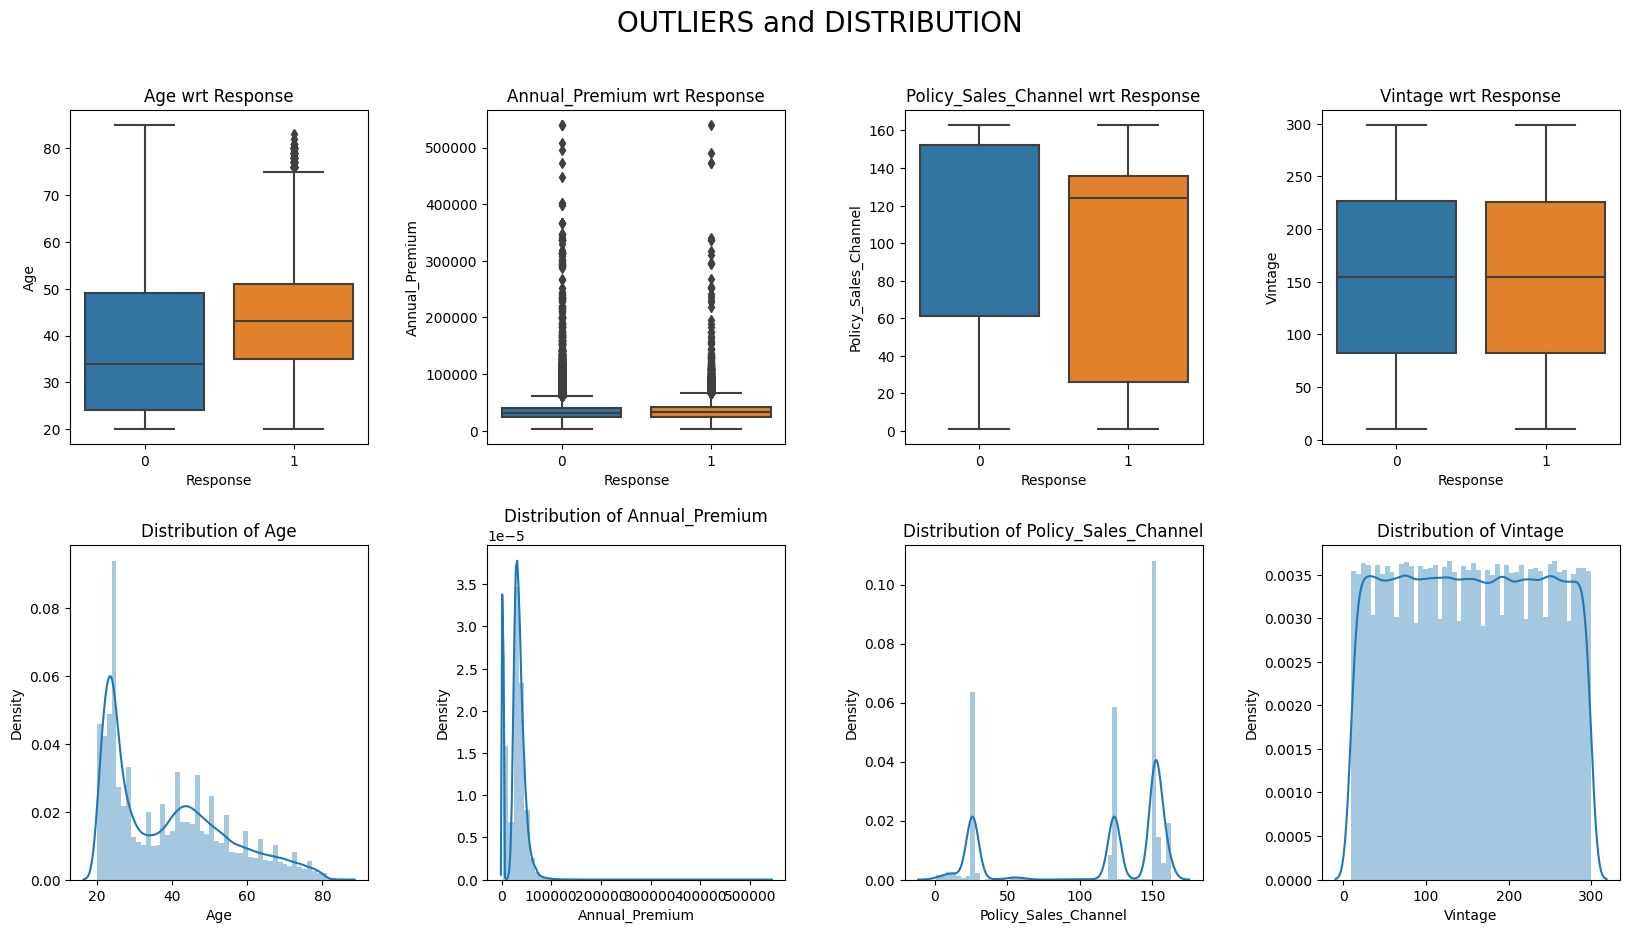

In [58]:
# Plotting boxplot and Distribution plot on the same plane.
index=1
plt.figure(figsize= (20,10))
for i in ["Age","Annual_Premium","Policy_Sales_Channel","Vintage"]:
  plt.subplot(2,4,index)
  index= index+1
  plot_data=df[i]
  sns.boxplot(x=df.Response,y=plot_data)
  plt.title(f'{i} wrt Response')
for i in ["Age","Annual_Premium","Policy_Sales_Channel","Vintage"]:
  plt.subplot(2,4,index)
  index= index+1
  plot_data=df[i]
  sns.distplot(plot_data)
  plt.title(f"Distribution of {i}")
  plt.subplots_adjust(hspace = 0.3, wspace= 0.4)
  plt.suptitle("OUTLIERS and DISTRIBUTION", fontsize=20)

## REMARKS :
> ### For **Age** column, Response-1 has some outliers.
> ### **Annual_Premium** has a lot of outliers.
> ### Column **Age and Annual_Premium** are **Right Skewed**, While Vintage Column is uniformly distributed.

In [59]:
# Creating a Function for removing outliers.
def remove_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    lower_fence  = q1-1.5*iqr
    upper_fence = q3+1.5*iqr
    revised_df = data.loc[(data[column] >= lower_fence) & (data[column] <= upper_fence)]
    return revised_df

In [60]:
# Removing outliers from "Annual_Premium" column
df=remove_outliers(df,'Annual_Premium')

<Axes: xlabel='Response', ylabel='Annual_Premium'>

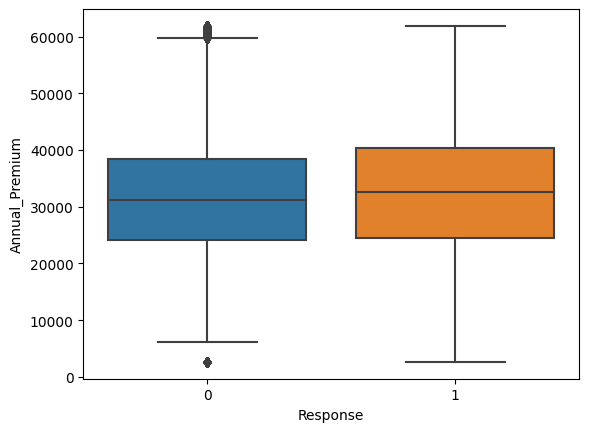

In [61]:
sns.boxplot(y=df.Annual_Premium, x= df.Response)

### As the Outliers in Age column won't affect the result, we are not treating the outliers of that column.


## Scaling the Data for better interpretation:

In [62]:
# Using MinMaxScaler to scale the data in the range of (0,1).
scaler = MinMaxScaler()

# Treating the required column and assigning a new column to it.
df['Annual_Premium_Treated'] = scaler.fit_transform(df['Annual_Premium'].values.reshape(-1,1))
df['Vintage_Treated'] = scaler.fit_transform(df['Vintage'].values.reshape(-1,1))

<Axes: xlabel='Annual_Premium_Treated', ylabel='Density'>

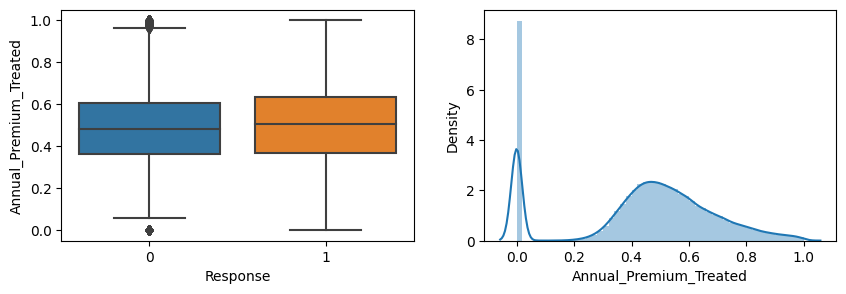

In [63]:
# Let's check the distribution again.
plt.figure(figsize= (10,3))
plt.subplot(1,2,1)
sns.boxplot(y= df.Annual_Premium_Treated, x= df.Response)
plt.subplot(1,2,2)
sns.distplot(df['Annual_Premium_Treated'])

### From the abobe plots we can see that there are less outliers present in Annual Premium.

# **EXPLORATORY DATA ANALYSIS :**


---



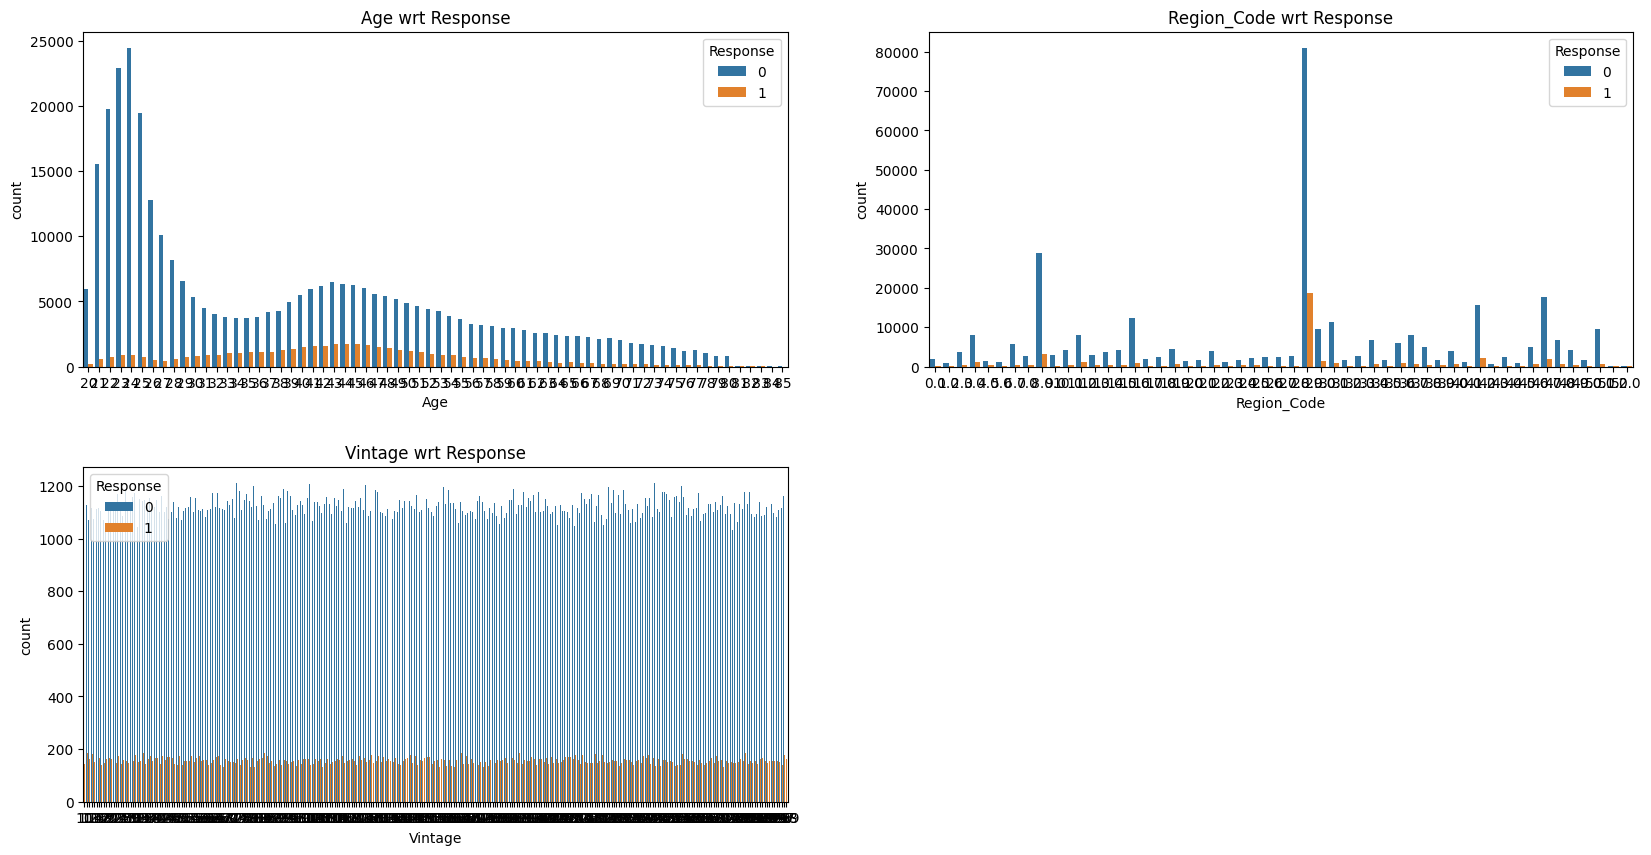

In [64]:
# Let's check Age, Region_Code, Policy_Sales_Channel, Vintage wrt Response
index= 1
plt.figure(figsize= (20,10))
for i in ['Age','Region_Code','Vintage']:
  plt.subplot(2,2,index)
  index +=1
  sns.countplot(x = i, data = df, hue='Response')
  plt.title(f'{i} wrt Response')
  plt.xlabel(i)
  plt.ylabel('count')
  plt.subplots_adjust(hspace = 0.3, wspace= 0.2)

In [65]:
# plt.figure(figsize=(25,12))
# sns.countplot(x=df.Region_Code, hue=df.Response)

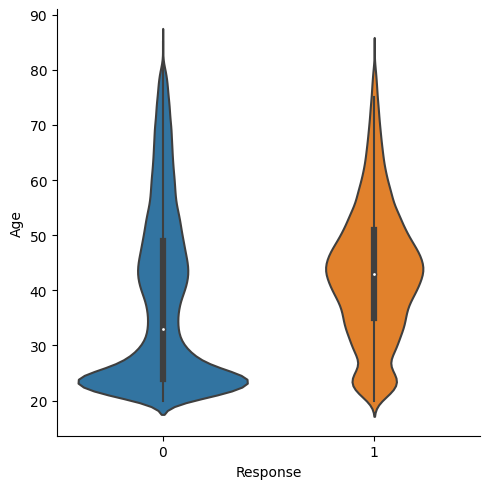

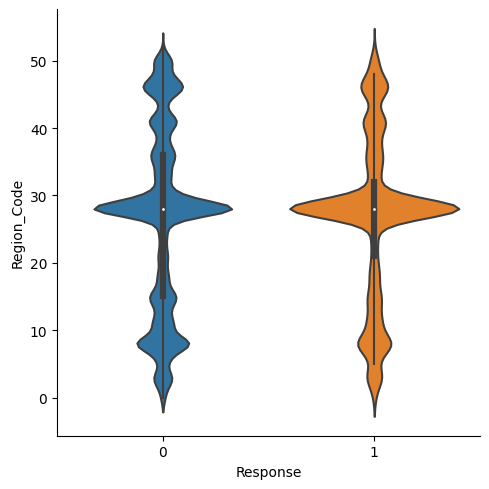

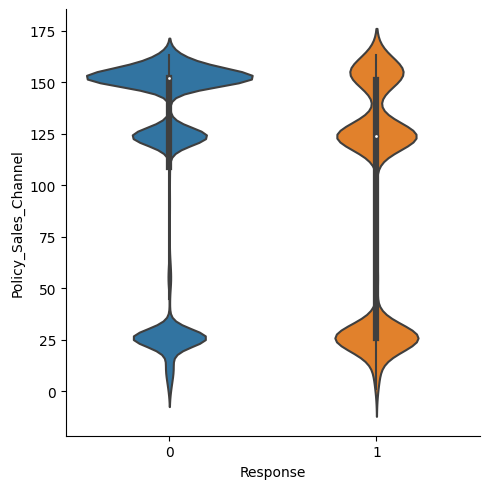

In [66]:
for i in ['Age','Region_Code','Policy_Sales_Channel']:
  sns.catplot(x= 'Response', y= i, data= df, kind= 'violin')

## REMARKS:
### From above plots we can see that-
> ### Middle aged people are more interested in taking the insurance  compared to the younger people.
> ### Vintage do not affect the interest in taking the Insurance.
> ### In the region having Region_code 28.0, people are more interested in taking the insurance. (This region might be a populated city and people own more vehicles here.)

<Axes: xlabel='Response', ylabel='count'>

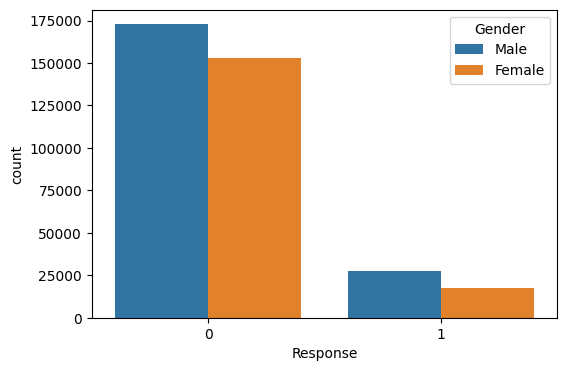

In [67]:
plt.figure(figsize=(6,4))
sns.countplot(x=df.Response,hue=df.Gender)

In [68]:
GM= df[df.Gender=='Male']
GF= df[df.Gender=='Female']

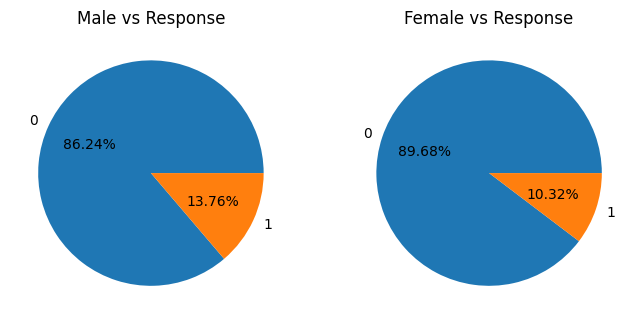

In [69]:
fig, ax= plt.subplots(1,2,figsize=(8,5))
ax[0].pie(GM.Response.value_counts(), labels= GM.Response.value_counts().index, autopct= "%1.2f%%")
ax[0].set_title('Male vs Response')
ax[1].pie(GF.Response.value_counts(), labels= GF.Response.value_counts().index, autopct= "%1.2f%%")
ax[1].set_title('Female vs Response')
plt.show()

## REMARKS :
### From above plots we can conclude that-
> ### In our dataset Male count is more than that of Female count.
> ### Out of the Male and Female population about **14% male** and **10% female** are interested in insurance.

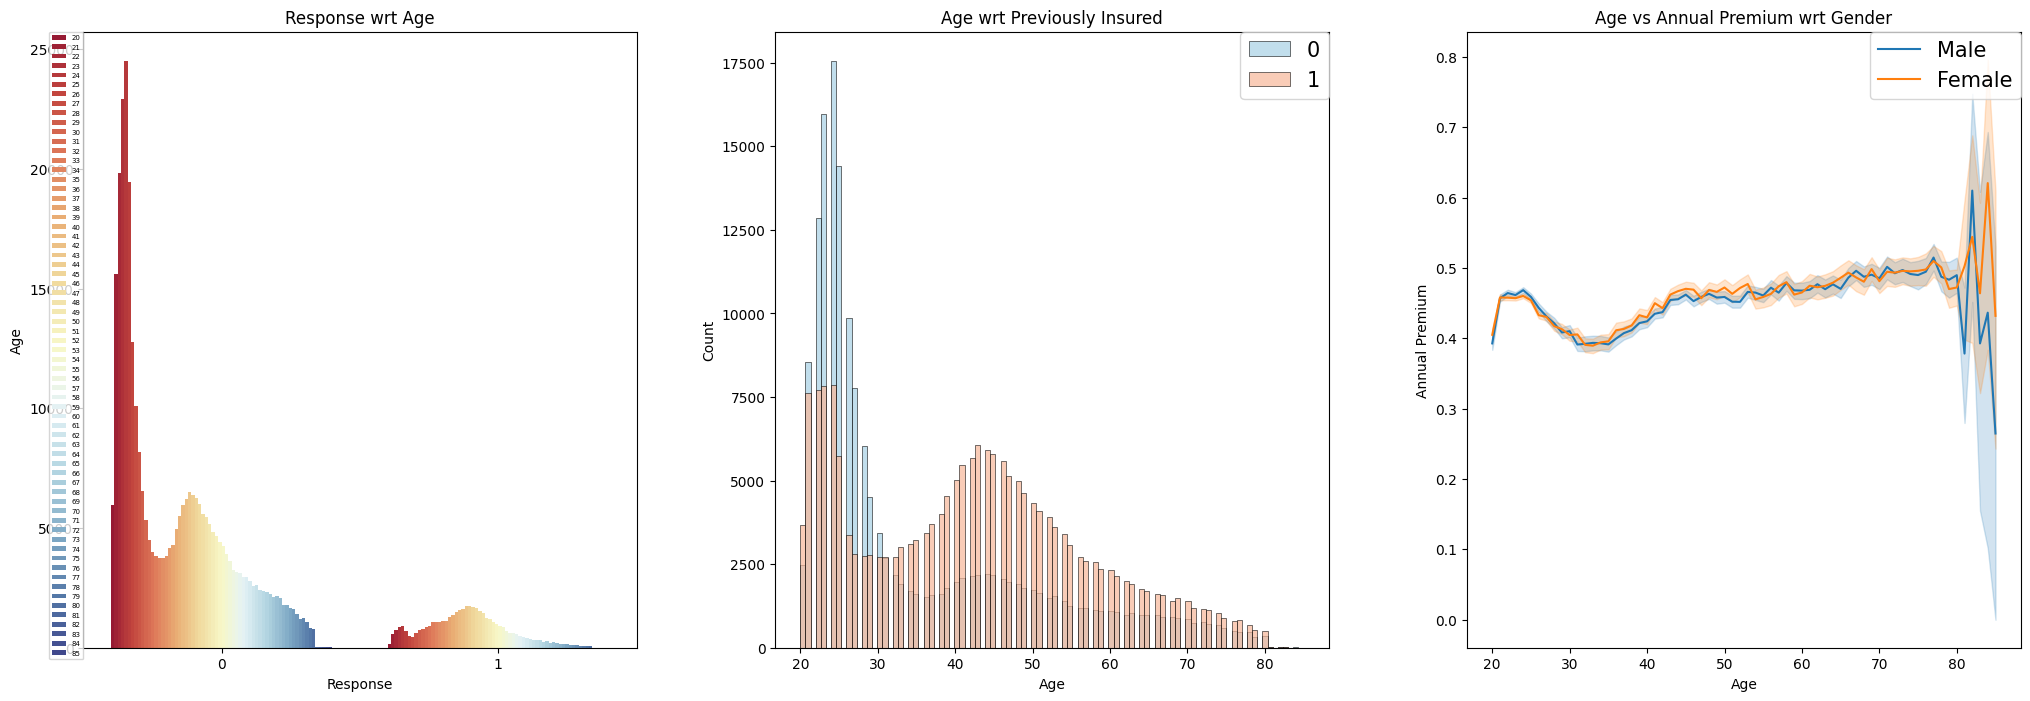

In [70]:
fig, ax= plt.subplots(1,3, figsize= (25,8))
sns.countplot(ax=ax[0], x=df.Response, hue=df.Age, palette='RdYlBu')
ax[0].set_title("Response wrt Age")
ax[0].set_xlabel("Response")
ax[0].set_ylabel("Age")
ax[0].legend(fontsize=5, bbox_to_anchor=(0,1),borderaxespad=0)

sns.histplot(ax=ax[1],x=df.Age, hue=df.Previously_Insured, palette='RdBu', alpha= 0.7)
ax[1].set_title("Age wrt Previously Insured")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Count")
ax[1].legend((0,1),fontsize=15,bbox_to_anchor=(1,1),borderaxespad=0)

sns.lineplot(ax= ax[2], x= df.Age, y= df.Annual_Premium_Treated, hue= df.Gender)
ax[2].set_title("Age vs Annual Premium wrt Gender")
ax[2].set_xlabel("Age")
ax[2].set_ylabel("Annual Premium")
ax[2].legend(fontsize=15,bbox_to_anchor=(1,1),borderaxespad=0)
plt.subplots_adjust(wspace= 0.25)

## REMARKS:
> ### From the Second plot we can see that mostly middle aged people have taken the Insurance before.
> ###  From the third plot we can see that, for people below 80 years old, the yearly premium for both male and female are almost same and for people beyond that age, the yearly premium is high for the females.


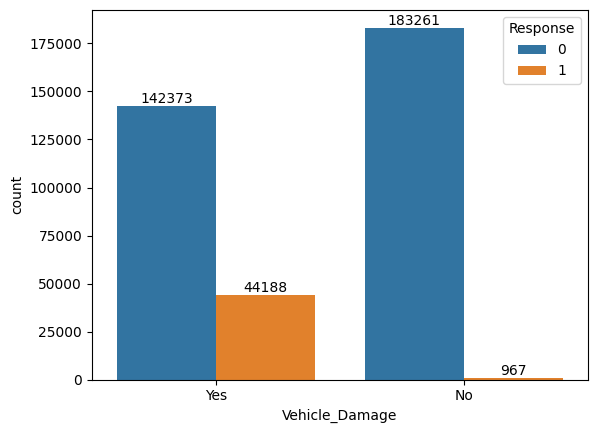

In [71]:
fig=sns.countplot(x=df.Vehicle_Damage,hue=df.Response)
for i in fig.containers:
    fig.bar_label(i)

## REMARKS:
> ### Out of 186561, 142373 people  have not taken Insurance even their vehicle got damaged.
> ### Out of 184228 , 967 people have taken the Insurance even their vehicle is not damaged.

In [72]:
df.Vehicle_Age.value_counts()

1-2 Year     194212
< 1 Year     161547
> 2 Years     15030
Name: Vehicle_Age, dtype: int64

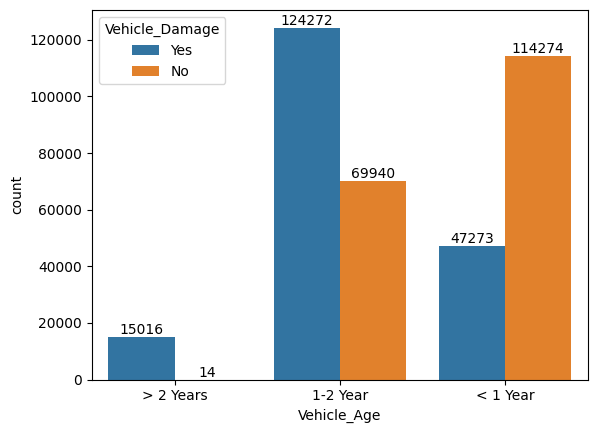

In [73]:
fig=sns.countplot(x=df['Vehicle_Age'], hue=df['Vehicle_Damage'])
for i in fig.containers:
    fig.bar_label(i)

##REMARKS:
> ### With increase in vehicle age, the ratio of damaged to the undamaged vehicle is increasing.

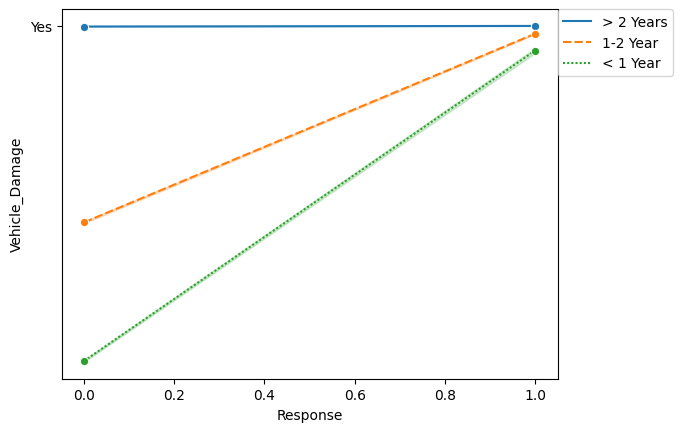

In [74]:
sns.lineplot(x=df.Response,y=df.Vehicle_Damage, hue=df.Vehicle_Age, marker="o", style=df.Vehicle_Age)
plt.legend(bbox_to_anchor=(1,1),borderaxespad=0)

<Axes: xlabel='Vehicle_Damage', ylabel='Annual_Premium_Treated'>

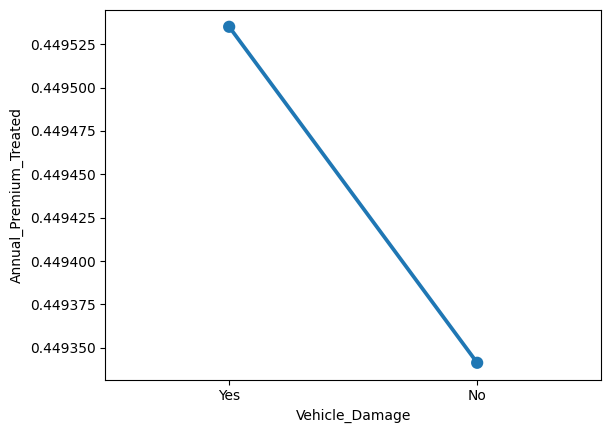

In [82]:
sns.pointplot(x = df.Vehicle_Damage, y = df.Annual_Premium_Treated, errorbar=None)

<Axes: xlabel='Vehicle_Damage', ylabel='Annual_Premium_Treated'>

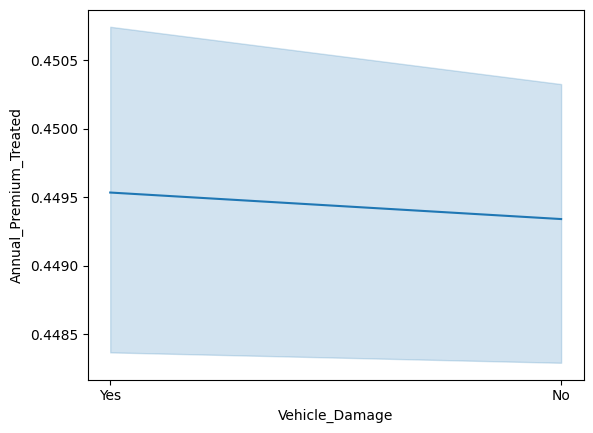

In [79]:
sns.lineplot(y=df.Annual_Premium_Treated, x= df.Vehicle_Damage)